In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_identity = pd.read_csv("train_identity.csv").filter(["TransactionID", "DeviceType"]).set_index("TransactionID")
train_transaction = pd.read_csv("train_transaction.csv")

In [3]:
train_transaction["isFraud"] = train_transaction["isFraud"].apply(lambda x: bool(x))

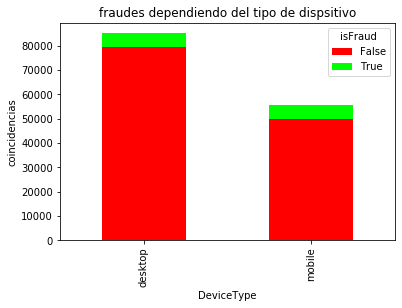

In [4]:
train_transaction[train_transaction["TransactionID"].isin(train_identity.index)].filter(["TransactionID", "isFraud"]).set_index("TransactionID").join(train_identity).value_counts().reset_index(name="coincidencias").pivot_table(index="isFraud", columns="DeviceType", values="coincidencias").T.plot(kind='bar', stacked=True, ylabel= "coincidencias", color=['r', 'lime'], title="fraudes dependiendo del tipo de dispsitivo") 

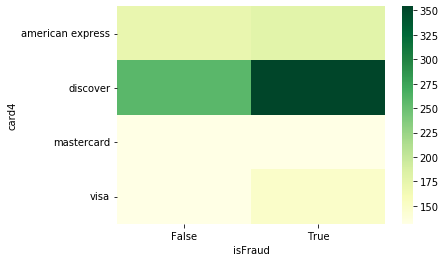

In [5]:
sns.heatmap(train_transaction.pivot_table(values='TransactionAmt', index= "card4", columns='isFraud', aggfunc='mean', fill_value = 0), cmap="YlGn")

Text(0.5, 1.0, 'distrubución de dirección de compra segun si es fraude o no')

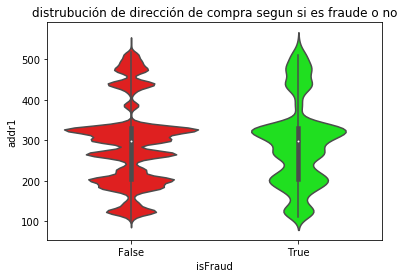

In [6]:
sns.violinplot(x="isFraud", y="addr1", data=train_transaction, palette=["red", "lime"]).set_title("distrubución de dirección de compra segun si es fraude o no")

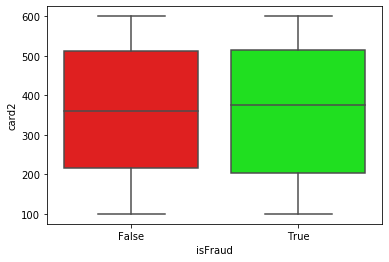

In [7]:
sns.boxplot(x="isFraud", y="card2", data=train_transaction, palette=["red", "lime"])

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0.5, 1.0, 'Distribucion de info de tarjeta para casos donde es fraude')

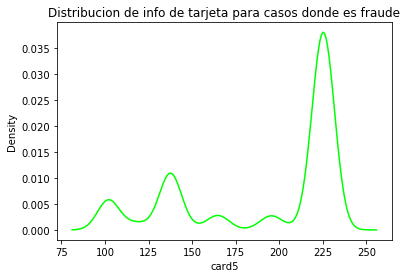

In [8]:
sns.kdeplot(data=train_transaction[train_transaction["isFraud"] == True]["card5"], color="lime").set_title("Distribucion de info de tarjeta para casos donde es fraude" )

In [9]:
train_transaction_filter=train_transaction.filter(["isFraud", "ProductCD"]).value_counts().reset_index(name="coincidencias").pivot_table(index="isFraud", columns="ProductCD", values="coincidencias")
train_transaction_filter[["C","H", "R", "S", "W"]] = train_transaction_filter[["C","H", "R", "S", "W"]].div(train_transaction_filter[["C","H", "R", "S", "W"]].sum(axis=0), axis=1).multiply(100)

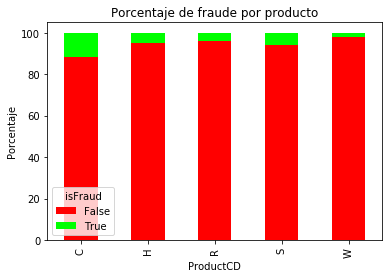

In [10]:
train_transaction_filter.T.plot(kind='bar', stacked=True, ylabel= "Porcentaje", color=['r', 'lime'], title="Porcentaje de fraude por producto") 